## WeRateDogs Twitter Archieve Data 

### project description
The dataset that I will be wrangling, analyzing, and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


#### Project Steps Overview

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

   - data wrangling efforts 
   - data analyses and visualizations



In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import os

%matplotlib inline

In [2]:
! ls

Untitled.ipynb
Untitled1.ipynb
Wrangling Data Project - Jupyter Notebook.pdf
Wrangling Data Project.ipynb
image-predictions.tsv
tweet-json copy
tweet-json.json
tweet_json.txt
tweets_data
twitter-api.rtf
twitter-archive-enhanced.csv
venv
~$itter-api.rtf


### Project Motivation
wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

# Gather Data 

- I have Downloaded "twitter-archive-enhanced.csv", uploaded it using pandas
- I have Downloaded "image-predictions.tsv" programmatically using the link provided
- I have queried Twitter API using Tweepy lib, saved the data in a file called "Tweets-json.txt", and uploaded the data of the "Tweets-json.txt" inta a DF using pandas 

In [3]:
# upload the data of "tweet-json.json"
tweets = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
tweets.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
# download the data of "image-predictions.tsv" programmatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# get request to get the file data from the url
r = requests.get(url)

# write the data into a file
with open("image-predictions.tsv", mode = "wb") as file:
    file.write(r.content)

In [6]:
!ls

Untitled.ipynb
Untitled1.ipynb
Wrangling Data Project - Jupyter Notebook.pdf
Wrangling Data Project.ipynb
image-predictions.tsv
tweet-json copy
tweet-json.json
tweet_json.txt
tweets_data
twitter-api.rtf
twitter-archive-enhanced.csv
venv
~$itter-api.rtf


In [7]:
# upload the data of "image-predictions.tsv"
predictions = pd.read_csv("image-predictions.tsv", delimiter = "\t")

In [8]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Twitter API Data Gathering

I'll be using Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive. This additional data will include retweet count and favorite count.

In [26]:
# tweepy authentication
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [58]:
# query the twitter API for each tweet data using tweets IDs
tweets_id = tweets["tweet_id"]

# create a dict to save info about failed quries
failed = {}

# loop over each id query the API, Write data into file
start = timer()
with open("tweets_data", "w") as file:
    file.write("tweet_id,favourite_count,retweet_count\n")
    for tweet_id in tweets_id:
        try:
            # query the API
            tweet = api.get_status(tweet_id, tweet_mode='extended')._json
            
            # get the favourite, and retweet counts
            favourite_count = tweet["favorite_count"]
            retweet_count = tweet["retweet_count"]
            
            # write the favourite, and retweet count onto the file
            file.write("{},{},{}\n".format(tweet_id,favourite_count,retweet_count))
            print("Sucessful Query")
            
        # handling failed queries
        except tweepy.errors.TweepyException as e:
            print("Failed Query")
            failed[ID] = e
            
            pass
    
    end = timer()
    print(end - start)
    
    print(failed)

Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Failed Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Q

Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Failed Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Q

Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessfu

Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessful Query
Sucessfu

Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query
Failed Query

In [10]:
tweets_api = pd.read_csv("tweets_data")

In [11]:
tweets_api

,tweet_id,favourite_count,retweet_count
0,892420643555336193,33670,6962
1,892177421306343426,29209,5267
2,891815181378084864,21958,3463
3,891689557279858688,36764,7188
4,891327558926688256,35157,7709
...,...,...,...
1570,677187300187611136,2476,806
1571,676975532580409345,2519,947
1572,676957860086095872,2018,719
1573,676949632774234114,1177,348


# Data Wrangling Process
## Assesment

I will start the wrangling process for the data I have, The data consists of three Dfs
- tweets from twitter archieve data 
- prediection AI algorithm used to predict the dog breeds
- tweets_api Data gathered through query twitter API for tweets favourites, and retweets counts

### Visual Assessment

In [12]:
# Visual Assesment of tweets Df
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
tweets_api

,tweet_id,favourite_count,retweet_count
0,892420643555336193,33670,6962
1,892177421306343426,29209,5267
2,891815181378084864,21958,3463
3,891689557279858688,36764,7188
4,891327558926688256,35157,7709
...,...,...,...
1570,677187300187611136,2476,806
1571,676975532580409345,2519,947
1572,676957860086095872,2018,719
1573,676949632774234114,1177,348


### Programmatic Assessment

In [15]:
# tweets_df
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [17]:
tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [18]:
tweets.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [19]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# prediction df
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
372,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False
443,674638615994089473,https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg,1,Pomeranian,0.846986,True,chow,0.142014,True,keeshond,0.002605,True
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False
1090,719339463458033665,https://pbs.twimg.com/media/Cfuba6NW4AIeMHk.jpg,1,golden_retriever,0.765778,True,borzoi,0.071148,True,Leonberg,0.070371,True
275,670838202509447168,https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg,1,flamingo,0.992710,False,coral_fungus,0.003491,False,stinkhorn,0.001859,False
1967,867900495410671616,https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg,1,Labrador_retriever,0.522644,True,kuvasz,0.332461,True,dalmatian,0.032008,True
1296,752173152931807232,https://pbs.twimg.com/media/CnBBfNuWcAAkOgO.jpg,1,Labrador_retriever,0.527659,True,German_shepherd,0.174765,True,Chihuahua,0.045525,True
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
266,670804601705242624,https://pbs.twimg.com/media/CU8tOJZWUAAlNoF.jpg,1,Pomeranian,0.868560,True,Pekinese,0.090129,True,chow,0.021722,True


In [22]:
predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [23]:
predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [24]:
predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [25]:
predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [26]:
# tweets_api Df
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         1575 non-null   int64
 1   favourite_count  1575 non-null   int64
 2   retweet_count    1575 non-null   int64
dtypes: int64(3)
memory usage: 37.0 KB


In [27]:
tweets_api.head()

,tweet_id,favourite_count,retweet_count
0,892420643555336193,33670,6962
1,892177421306343426,29209,5267
2,891815181378084864,21958,3463
3,891689557279858688,36764,7188
4,891327558926688256,35157,7709


In [28]:
tweets_api.describe()

,tweet_id,favourite_count,retweet_count
count,1.575000e+03,1575.000000,1575.000000
mean,7.626943e+17,8793.850159,2972.690159
std,6.747285e+16,12250.344855,4636.092860
min,6.769482e+17,0.000000,1.000000
25%,6.990760e+17,2238.000000,792.500000
50%,7.472042e+17,4057.000000,1591.000000
75%,8.231225e+17,11266.500000,3341.000000
max,8.924206e+17,144016.000000,70244.000000


In [29]:
tweets_api.tail()

,tweet_id,favourite_count,retweet_count
1570,677187300187611136,2476,806
1571,676975532580409345,2519,947
1572,676957860086095872,2018,719
1573,676949632774234114,1177,348
1574,676948236477857792,1950,771


## Assesment Report

## Quality Issues
##### Tweets DF
- Miising Data in __[in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp]__ columns
- In source column the link is extracted with "a" HTML tag
- __Name__ column, Mistaken values such as [ single character name "a"]
- Mistaken values in __[rating_denominator, rating_numerator]__ columns
- erroneous entry Nu: 1970 has p1 value __laptop__


##### Predictions DF
- columns names of predictions columns are not descriptive __EX/ P1 --> prediction_01__
- predictions names are not proper cased, have "_" delimiters
- erroneous prediction values in __P1, P2, and P3__ columns
- There is missing records in predections DF

##### Tweets_api  DF
- Missing Records


## Tidness Issues
##### Tweets DF
- __Dog stages, Dog names__ Columns are in the same DF with Tweets data 
- Columns that are not Necessary for our analysis such as __[in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp]__ Columns
- data in the columns __[doggo, floofer, pupper, puppo]


##### Predictions DF
- Data about predictions and Tweets are in the same DFs
- repeated _tweet_id_ column

##### Tweets_api  DF
- repeated __tweet_id__ column

# Cleaning

In [30]:
# copying the original Dfs
tweets_clean = tweets.copy()
pred_clean = predictions.copy()
api_clean = tweets_api.copy()

### Clean Completness issues

In [31]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [32]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         1575 non-null   int64
 1   favourite_count  1575 non-null   int64
 2   retweet_count    1575 non-null   int64
dtypes: int64(3)
memory usage: 37.0 KB


### Define:
- Drop [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] Columns
- Fill missing data of dog stages

### Code

In [34]:
tweets_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [35]:
# drop unrequirred columns
tweets_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "name", "source"], axis = 1, inplace = True)

In [36]:
tweets_clean["puppo"].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [37]:
tweets_clean["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [38]:
tweets_clean["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [39]:
tweets_clean["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [40]:
# fill dog stages data
tweets_clean["stage"] = None

for i, row in tweets_clean.iterrows():
    if tweets_clean.loc[i, "text"].find("puppo") != -1: 
        tweets_clean.loc[i,"stage"] = "puppo"
    if tweets_clean.loc[i, "text"].find("pupper") != -1:
        tweets_clean.loc[i,"stage"] = "pupper"
    if tweets_clean.loc[i, "text"].find("floofer") != -1:
        tweets_clean.loc[i,"stage"] = "floofer"
    if tweets_clean.loc[i, "text"].find("doggo") != -1:
        tweets_clean.loc[i,"stage"] = "doggo"
    

### Test

In [41]:
tweets_clean.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
expanded_urls           59
rating_numerator         0
rating_denominator       0
doggo                    0
floofer                  0
pupper                   0
puppo                    0
stage                 1957
dtype: int64

In [42]:
tweets_clean["stage"].value_counts()

pupper     262
doggo       98
puppo       35
floofer      4
Name: stage, dtype: int64

### Define

- Drop the Df columns [doggo, puppo, floofer, pupper] 

### Code

In [43]:
tweets_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1, inplace = True)

In [44]:
tweets_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,None
...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None


### Test 

In [45]:
len(tweets[tweets["doggo"] != "None"]) + len(tweets[tweets["puppo"] != "None"]) + len(tweets[tweets["floofer"] != "None"]) + len(tweets[tweets["pupper"] != "None"])

394

In [46]:
tweets_clean["stage"].count()

399

### Define

Create two tables 
- tweets data 
- dogs and prediction data

### Code

In [47]:
dog_data = tweets_clean.merge(pred_clean, on = "tweet_id", how = "inner")

In [48]:
dog_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   int64  
 1   timestamp           2075 non-null   object 
 2   text                2075 non-null   object 
 3   expanded_urls       2075 non-null   object 
 4   rating_numerator    2075 non-null   int64  
 5   rating_denominator  2075 non-null   int64  
 6   stage               338 non-null    object 
 7   jpg_url             2075 non-null   object 
 8   img_num             2075 non-null   int64  
 9   p1                  2075 non-null   object 
 10  p1_conf             2075 non-null   float64
 11  p1_dog              2075 non-null   bool   
 12  p2                  2075 non-null   object 
 13  p2_conf             2075 non-null   float64
 14  p2_dog              2075 non-null   bool   
 15  p3                  2075 non-null   object 
 16  p3_con

In [49]:
dog_data.drop(["timestamp", "text", "expanded_urls","jpg_url"], axis = 1, inplace  = True)

In [50]:
tweets_data = tweets_clean.merge(api_clean, on = "tweet_id", how = "inner")

In [51]:
tweets_data.drop(["rating_numerator", "rating_denominator", "stage"], axis = 1, inplace = True)

### Test

In [52]:
dog_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   int64  
 1   rating_numerator    2075 non-null   int64  
 2   rating_denominator  2075 non-null   int64  
 3   stage               338 non-null    object 
 4   img_num             2075 non-null   int64  
 5   p1                  2075 non-null   object 
 6   p1_conf             2075 non-null   float64
 7   p1_dog              2075 non-null   bool   
 8   p2                  2075 non-null   object 
 9   p2_conf             2075 non-null   float64
 10  p2_dog              2075 non-null   bool   
 11  p3                  2075 non-null   object 
 12  p3_conf             2075 non-null   float64
 13  p3_dog              2075 non-null   bool   
dtypes: bool(3), float64(3), int64(4), object(4)
memory usage: 200.6+ KB


In [53]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 1574
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1575 non-null   int64 
 1   timestamp        1575 non-null   object
 2   text             1575 non-null   object
 3   expanded_urls    1531 non-null   object
 4   favourite_count  1575 non-null   int64 
 5   retweet_count    1575 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 86.1+ KB


### Define

- Rename dog_data DF columns names

### Code

In [54]:
dog_data = dog_data.rename(columns = {"p1":"prediction1", "p2":"prediction2", "p3":"prediction3","p1_conf": "prediction1_conf", "p2_conf": "prediction2_conf", "p3_conf": "prediction3_conf", "p1_dog": "prediction1_dog", "p2_dog": "prediction2_dog", "p3_dog": "prediction3_dog"})

### Define 

- Make predictions names correct and propper cased

### Code

In [55]:
dog_data["prediction1"] = dog_data["prediction1"].str.replace("_", " ")
dog_data["prediction2"] = dog_data["prediction2"].str.replace("_", " ")
dog_data["prediction3"] = dog_data["prediction3"].str.replace("_", " ")

### Test

In [56]:
dog_data.sample(10)

,tweet_id,rating_numerator,rating_denominator,stage,img_num,prediction1,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog
733,758828659922702336,13,10,doggo,1,Chesapeake Bay retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.121840,True
731,759047813560868866,11,10,None,1,Labrador retriever,0.778546,True,bathing cap,0.154254,False,golden retriever,0.024972,True
951,727175381690781696,10,10,None,2,flat-coated retriever,0.656463,True,Great Dane,0.084766,True,Labrador retriever,0.058909,True
1611,674999807681908736,13,10,None,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan coonhound,0.078602,True
1716,672614745925664768,6,10,pupper,1,starfish,0.712717,False,goldfish,0.258865,False,sea cucumber,0.002015,False
377,816697700272001025,12,10,None,1,Chihuahua,0.756992,True,Pomeranian,0.052850,True,Maltese dog,0.047608,True
1721,672591271085670400,8,10,None,1,gondola,0.134290,False,lifeboat,0.108356,False,bassinet,0.093679,False
801,750026558547456000,10,10,None,1,standard poodle,0.258732,True,teddy,0.130760,False,toy poodle,0.071726,True
335,822462944365645825,14,10,pupper,3,Pomeranian,0.960199,True,Samoyed,0.023056,True,Maltese dog,0.008945,True
584,782722598790725632,10,10,None,1,Irish setter,0.574557,True,golden retriever,0.339251,True,seat belt,0.046108,False


### Define

- correct numerator and denominator values in tweets_data

### Code

In [57]:
for i, record in dog_data.iterrows():
    dog_data.loc[i, "rating_denominator"] = 10
    
    if dog_data.loc[i, "rating_numerator"] > 20:
        dog_data.loc[i, "rating_numerator"] = 20
        
    if dog_data.loc[i, "rating_numerator"] < 10:
        dog_data.loc[i, "rating_numerator"] = 10
        

### Test

In [58]:
dog_data["rating_denominator"].value_counts()

10    2075
Name: rating_denominator, dtype: int64

In [59]:
dog_data["rating_numerator"].value_counts()

10    844
12    474
11    413
13    284
14     40
20     19
15      1
Name: rating_numerator, dtype: int64

### Define

- Remove records with predictions that is not a dog, for prediction1

### Code 

In [60]:
# Define a function to remove non-dog predictions
def correct_predictions(df, column_name):
    wrong_predictions = []
    
    predictions = df[column_name].value_counts().to_dict()

    for i in predictions.items():
        if i[1] <= 7:
            wrong_predictions.append(i[0])
            
    for i, record in df.iterrows():
        if df.loc[i, column_name] in wrong_predictions:
            df.drop(i, inplace = True)
            
    return df 


In [61]:
dog_data = correct_predictions(dog_data, "prediction1")

In [62]:
dog_data = correct_predictions(dog_data, "prediction2")

In [63]:
dog_data = correct_predictions(dog_data, "prediction3")

### Test

In [64]:
dog_data["prediction1"].value_counts()

golden retriever                  104
Pembroke                           74
Labrador retriever                 55
Chihuahua                          41
pug                                36
Samoyed                            26
malamute                           26
Pomeranian                         23
French bulldog                     19
toy poodle                         18
Siberian husky                     17
chow                               17
Staffordshire bullterrier          16
Cardigan                           15
Eskimo dog                         14
Shetland sheepdog                  13
seat belt                          13
German shepherd                    11
Great Pyrenees                     10
Border collie                       9
American Staffordshire terrier      8
kuvasz                              8
Pekinese                            8
Shih-Tzu                            8
beagle                              8
cocker spaniel                      7
Maltese dog 

In [65]:
dog_data["prediction2"].value_counts()

Labrador retriever                63
Cardigan                          62
golden retriever                  54
Siberian husky                    31
Pomeranian                        29
French bulldog                    29
Chihuahua                         27
Pembroke                          22
Eskimo dog                        22
collie                            21
kuvasz                            19
Chesapeake Bay retriever          17
Samoyed                           17
miniature poodle                  17
cocker spaniel                    16
Boston bull                       16
toy poodle                        16
American Staffordshire terrier    14
Pekinese                          12
beagle                            12
chow                              12
toy terrier                       11
malamute                          11
malinois                          11
Italian greyhound                 10
Great Pyrenees                     9
Staffordshire bullterrier          9
m

In [66]:
dog_data["prediction3"].value_counts()

Labrador retriever                53
Chihuahua                         43
Eskimo dog                        32
kuvasz                            30
golden retriever                  27
kelpie                            26
Pekinese                          24
Staffordshire bullterrier         23
cocker spaniel                    22
French bulldog                    21
chow                              21
malamute                          20
Great Pyrenees                    20
Pembroke                          18
basenji                           18
Pomeranian                        18
Cardigan                          17
American Staffordshire terrier    16
Boston bull                       15
bull mastiff                      15
beagle                            14
toy terrier                       13
Chesapeake Bay retriever          13
Siberian husky                    13
Saluki                            13
dingo                             12
pug                               12
S

In [67]:
dog_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 1 to 2072
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            736 non-null    int64  
 1   rating_numerator    736 non-null    int64  
 2   rating_denominator  736 non-null    int64  
 3   stage               128 non-null    object 
 4   img_num             736 non-null    int64  
 5   prediction1         736 non-null    object 
 6   prediction1_conf    736 non-null    float64
 7   prediction1_dog     736 non-null    bool   
 8   prediction2         736 non-null    object 
 9   prediction2_conf    736 non-null    float64
 10  prediction2_dog     736 non-null    bool   
 11  prediction3         736 non-null    object 
 12  prediction3_conf    736 non-null    float64
 13  prediction3_dog     736 non-null    bool   
dtypes: bool(3), float64(3), int64(4), object(4)
memory usage: 87.3+ KB


In [82]:
dog_tweets = tweets_data.merge(dog_data, on = "tweet_id", how = "inner")

In [83]:
dog_tweets.to_csv("twitter_archive_master.csv")

# Analysis

### Analysis Question:
- __What is the dogs types with the highest rates?__
- __What is the dog stage with highest highest rates?__
- __Does dogs types with highest favourite counts is the same with which has highest rates?__

__Q1:What is the dogs types with the highest rates?__
- For this question I will take the predictions with the highest accuracy and get its raitings 

In [68]:
dog_data.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,prediction1_conf,prediction2_conf,prediction3_conf
count,7.360000e+02,736.000000,736.0,736.000000,736.000000,736.000000,736.000000
mean,7.482580e+17,11.449728,10.0,1.241848,0.659017,0.140173,0.057690
std,6.888079e+16,1.403659,0.0,0.611623,0.246713,0.106887,0.054703
min,6.660334e+17,10.000000,10.0,1.000000,0.107948,0.000059,0.000008
25%,6.816355e+17,10.000000,10.0,1.000000,0.447652,0.045930,0.009727
50%,7.354523e+17,11.000000,10.0,1.000000,0.683583,0.127897,0.042427
75%,8.062250e+17,12.000000,10.0,1.000000,0.887826,0.207808,0.093575
max,8.921774e+17,20.000000,10.0,4.000000,0.999885,0.467678,0.273419


from this summary, the mean, min, and max predictions confirmations is for prediction 1 so i will use prediction one columns

In [69]:
# Create Rating Column
dog_data["rating_numerator"].astype(float)
dog_data["rating_numerator"].astype(float)

dog_data["final_rating"] = dog_data["rating_numerator"] / 10.0

In [70]:
dog_data

,tweet_id,rating_numerator,rating_denominator,stage,img_num,prediction1,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog,final_rating
1,892177421306343426,13,10,None,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,12,10,None,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
7,890729181411237888,13,10,None,2,Pomeranian,0.566142,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True,1.3
9,890240255349198849,14,10,doggo,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,1.4
10,890006608113172480,13,10,None,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,666287406224695296,10,10,None,1,Maltese dog,0.857531,True,toy poodle,0.063064,True,miniature poodle,0.025581,True,1.0
2055,666273097616637952,11,10,None,1,Italian greyhound,0.176053,True,toy terrier,0.111884,True,basenji,0.111152,True,1.1
2061,666082916733198337,10,10,None,1,pug,0.489814,True,bull mastiff,0.404722,True,French bulldog,0.048960,True,1.0
2064,666063827256086533,10,10,None,1,golden retriever,0.775930,True,Tibetan mastiff,0.093718,True,Labrador retriever,0.072427,True,1.0


In [71]:
# Visualize raiting with dog types
base_color = sns.color_palette()[0]
dog_groupedby_type = dog_data.groupby("prediction1").mean()

In [72]:
# Get the highest 10 types ratings
type_rating = pd.DataFrame(dog_groupedby_type.sort_values("final_rating")["final_rating"][-10:-1]).reset_index()

In [73]:
type_rating = type_rating.sort_values(by = "final_rating", ascending = False)
type_rating

,prediction1,final_rating
8,Great Pyrenees,1.250000
7,standard poodle,1.225000
6,Pekinese,1.212500
5,Eskimo dog,1.207143
4,Siberian husky,1.205882
1,English springer,1.200000
2,cocker spaniel,1.200000
3,Doberman,1.200000
0,golden retriever,1.190385


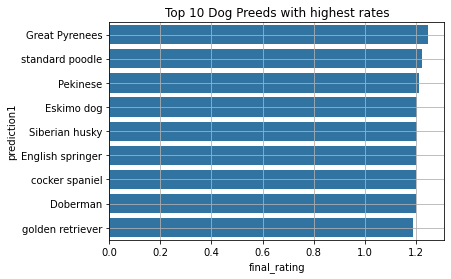

In [74]:
sns.barplot(data = type_rating, x = "final_rating", y = "prediction1", color = base_color)
plt.grid()
plt.title("Top 10 Dog Preeds with highest rates")
plt.show()

__Q2:What is the dog stage with highest highest rates?__
- For this question I will take the stage column and get its raitings 

In [75]:
stage_rating = pd.DataFrame(dog_data.groupby("stage").mean().sort_values("final_rating", ascending = False)["final_rating"]).reset_index()
stage_rating

,stage,final_rating
0,floofer,1.250000
1,doggo,1.196774
2,puppo,1.178571
3,pupper,1.164198


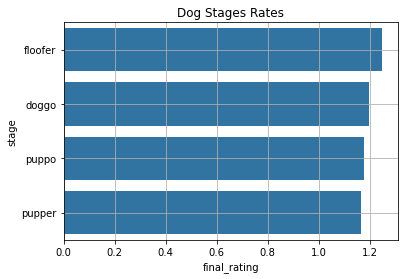

In [76]:
sns.barplot(data = stage_rating, x = "final_rating", y = "stage", color = base_color)
plt.grid()
plt.title("Dog Stages Rates")
plt.show()

__Q3 : Does dogs types with highest favourite counts is the same with which has highest rates?__

for this question i will create DF with dog preeds, final ratings, and Favourite counts.

In [ ]:
dog_tweets.to_csv()

In [85]:
dog_groupby_preed = dog_tweets.groupby("prediction1").mean()

In [100]:
# prepare plots DFs
preeds_ratings = dog_groupby_preed.sort_values("final_rating", ascending = False)[:10].reset_index()
preeds_favourites = dog_groupby_preed.sort_values("favourite_count", ascending = False)[:10].reset_index()

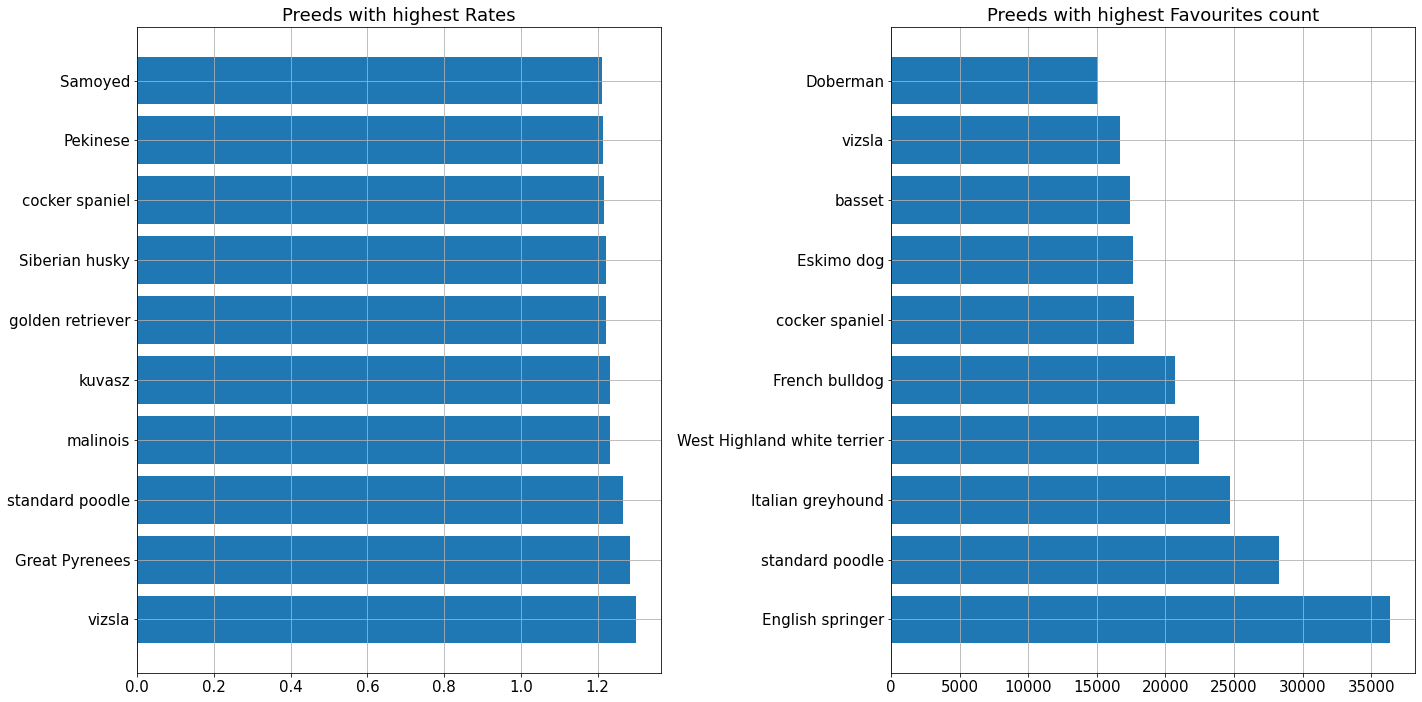

In [154]:
# Create multiple plots figure
figure, axis = plt.subplots(1, 2)

# plt1 --> Preeds with highest Rates
axis[0].barh(preeds_ratings["prediction1"] , preeds_ratings["final_rating"], color = base_color)
axis[0].set_title("Preeds with highest Rates")
axis[0].grid()

# plt2 --> Preeds with highest Favourites count
axis[1].barh(preeds_favourites["prediction1"], preeds_favourites["favourite_count"], color = base_color)
axis[1].set_title("Preeds with highest Favourites count")
axis[1].grid()

#plt size
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams.update({"font.size" : 15})
plt.tight_layout()

plt.show()

we notice difference in tweets rating of dogs and its favourite counts

# Report

### Report Wrangling efforts

__Gathering Data process__ <br>
I have Gathered data from multiple sources<br>
- Download a file from the internet "twitter-enhanced-archieve.tsv"
- Download programmatically "prediction.csv"
- Download API Archieve data using twitter API

__Assesment process__ <br>
using visual assesment and programmatic assesment techniques generating an assesment report with the data issues 
### Quality Issues
##### Tweets DF
- Miising Data in __[in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp]__ columns
- In source column the link is extracted with "a" HTML tag
- __Name__ column, Mistaken values such as [ single character name "a"]
- Mistaken values in __[rating_denominator, rating_numerator]__ columns
- erroneous entry Nu: 1970 has p1 value __laptop__


##### Predictions DF
- columns names of predictions columns are not descriptive __EX/ P1 --> prediction_01__
- predictions names are not proper cased, have "_" delimiters
- erroneous prediction values in __P1, P2, and P3__ columns
- There is missing records in predections DF

##### Tweets_api  DF
- Missing Records


### Tidness Issues
##### Tweets DF
- __Dog stages, Dog names__ Columns are in the same DF with Tweets data 
- Columns that are not Necessary for our analysis such as __[in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp]__ Columns
- data in the columns __[doggo, floofer, pupper, puppo]


##### Predictions DF
- Data about predictions and Tweets are in the same DFs
- repeated _tweet_id_ column

##### Tweets_api  DF
- repeated __tweet_id__ column
<br>

### Cleaning Process
Clean __Quality Issues__ and __Tidness Issues__ as 
mentined in the Define - Code - Test framework

### Report Analysis and Visualization efforts

The Analysis process was focus on answering these questions
### Analysis Question:
- __Q1: What is the dogs types with the highest rates?__
For this question I will take the predictions with the highest accuracy and get its raitings<br>
Data Frame used __type_rating__ grouped by preeds<br>
using bar plot to represent the preeds with highest rates<br>
<br>
- __Q2: What is the dog stage with highest highest rates?__
For this question I will take the stage column and get its raitings<br>
Data Frame used __stage_rating__ grouped by stages<br>
using bar plot to represent the stages with highest rates<br>
<br>
- __Q3: Does dogs types with highest favourite counts is the same with which has highest rates?__
for this question i will create DF with dog preeds, final ratings, and Favourite counts
Data Frame used __dog_tweets__ grouped by preeds and sorted in seperated DFs __preeds_rating__ and __preeds_favourite__ <br>
using bar plot to represent the preeds with highest rates and favourite counts